# Calculation of the path in a two-body interaction with polar system
---

Now we have to deal with the recostruction of the path route by a body that interact with another body. The system we want to analyse is the polar system in wich one of the two body is the center of the system and so the center of the interaction.

To have a proper view of the problem we can see the model in the figure below:


<img src="./img/polar_system_model.png">

To manage well the problem we have to handle well the velocity projection and the differential that represent the evolution of the body during the time.

The projections are important because in this example we will reconstruct the path in a Cartesian plane, so we have to convert the polar system in Cartesian coordinates, that have the center of the plane as the center of the polar system (so the center of the interaction).

The differential equation that we have to deal with are these:

$$ \frac{dp_{r}}{dt} = \frac{-\partial H}{\partial r} = \frac{-dV}{dr} $$

$$ \frac{dr}{dt} = \frac{\partial H}{\partial p_{r}} = \frac{p_{r}}{\mu} $$

$$ \frac{dp_{\theta}}{dt} = \frac{-\partial H}{\partial \theta} = 0 $$

$$ \frac{\theta}{dt} = \frac{\partial H}{\partial p_{\theta}} = \frac{p_{\theta}}{\mu} $$

<hr>

$$ \frac{dp_{\varphi}}{dt} = \frac{-\partial H}{\partial \varphi} = 0 $$

$$ \frac{d\varphi}{dt} = \frac{\partial H}{\partial p_{\varphi}} = const $$

<hr>

$$ H = \frac{v_{r}^{2} + r^{2}v_{\theta}^{2}}{2\mu} + V(r) = \frac{p_{r}^{2} + p_{\theta}^{2}}{2\mu} + V(r) $$

The potential $V(r)$ will be $\frac{1}{r}$.

Next we can see the Python code that calculates some paths changing the starting angle $\theta$:

Calculate deg 0.0
Calculate deg 5.0
Calculate deg 10.0
Calculate deg 15.0
Calculate deg 20.0
Calculate deg 25.0
Calculate deg 30.0
Calculate deg 35.0


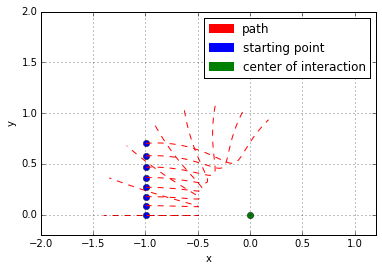

In [18]:
%matplotlib inline

from mpmath import sin, cos, sec, degrees, radians, pi
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

initial_distance = 1.0
theta_i = radians(0.0)

for step in range(8):
    points_x = []
    points_y = []

    var_mu = 1. / 2.

    r_i = sec(theta_i) * initial_distance
    var_b = sin(theta_i) * r_i
    
    print("Calculate deg {0}".format(str(degrees(theta_i))))

    v_i = 1.0
    d_t = 0.001

    # Differential
    d_pr = lambda r, p_theta, mu: - \
        (((r * p_theta**2) / mu) - (1 / r**2)) * d_t
    d_r = lambda p_r, mu: (p_r / mu) * d_t
    d_p_theta = 0
    d_theta = lambda r, p_theta, mu: (p_theta / mu) * d_t

    # Initialize iteration
    theta = pi - theta_i
    p_r = v_i * cos(theta)
    p_theta = - v_i * sin(theta)
    r = r_i

    for x in range(1000):

        p_r += d_pr(r, p_theta, var_mu)
        r += d_r(p_r, var_mu)

        theta += d_theta(r, p_theta, var_mu)

        points_x.append(r * cos(theta))
        points_y.append(r * sin(theta))

    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(points_x[0:1], points_y[0:1], 'bo')
    plt.plot(points_x, points_y, 'r--')
    theta_i += radians(5.0)

plt.plot([0], [0], 'go')
plt.axis([-2, 1.2, -.2, 2])
red_line = mpatches.Patch(color='red', label='path')
blue_dot = mpatches.Patch(color='blue', label='starting point')
green_dot = mpatches.Patch(color='green', label='center of interaction')
plt.legend(handles=[red_line, blue_dot, green_dot])
plt.grid(True)
plt.figure()

The major problems arouse from:

* coordinate projections
* differential equations and partial resolution of the problem

In the simulation we used a *delta time* *millisecond* ($10^{-3}s$) and the distance can be misured in *nanometer* ($10^{-9}m$).